In [4]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('abalone.csv')

# Renombrar las columnas para eliminar espacios
df.columns = df.columns.str.strip()

# Codificar la columna 'Sex'
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Verificar los primeros registros
print(df.head())


   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


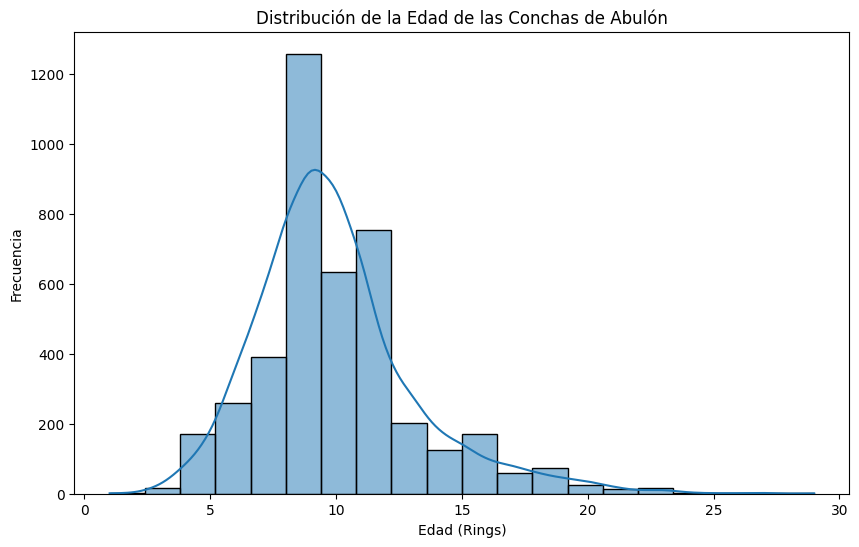

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title('Distribución de la Edad de las Conchas de Abulón')
plt.xlabel('Edad (Rings)')
plt.ylabel('Frecuencia')
plt.show()


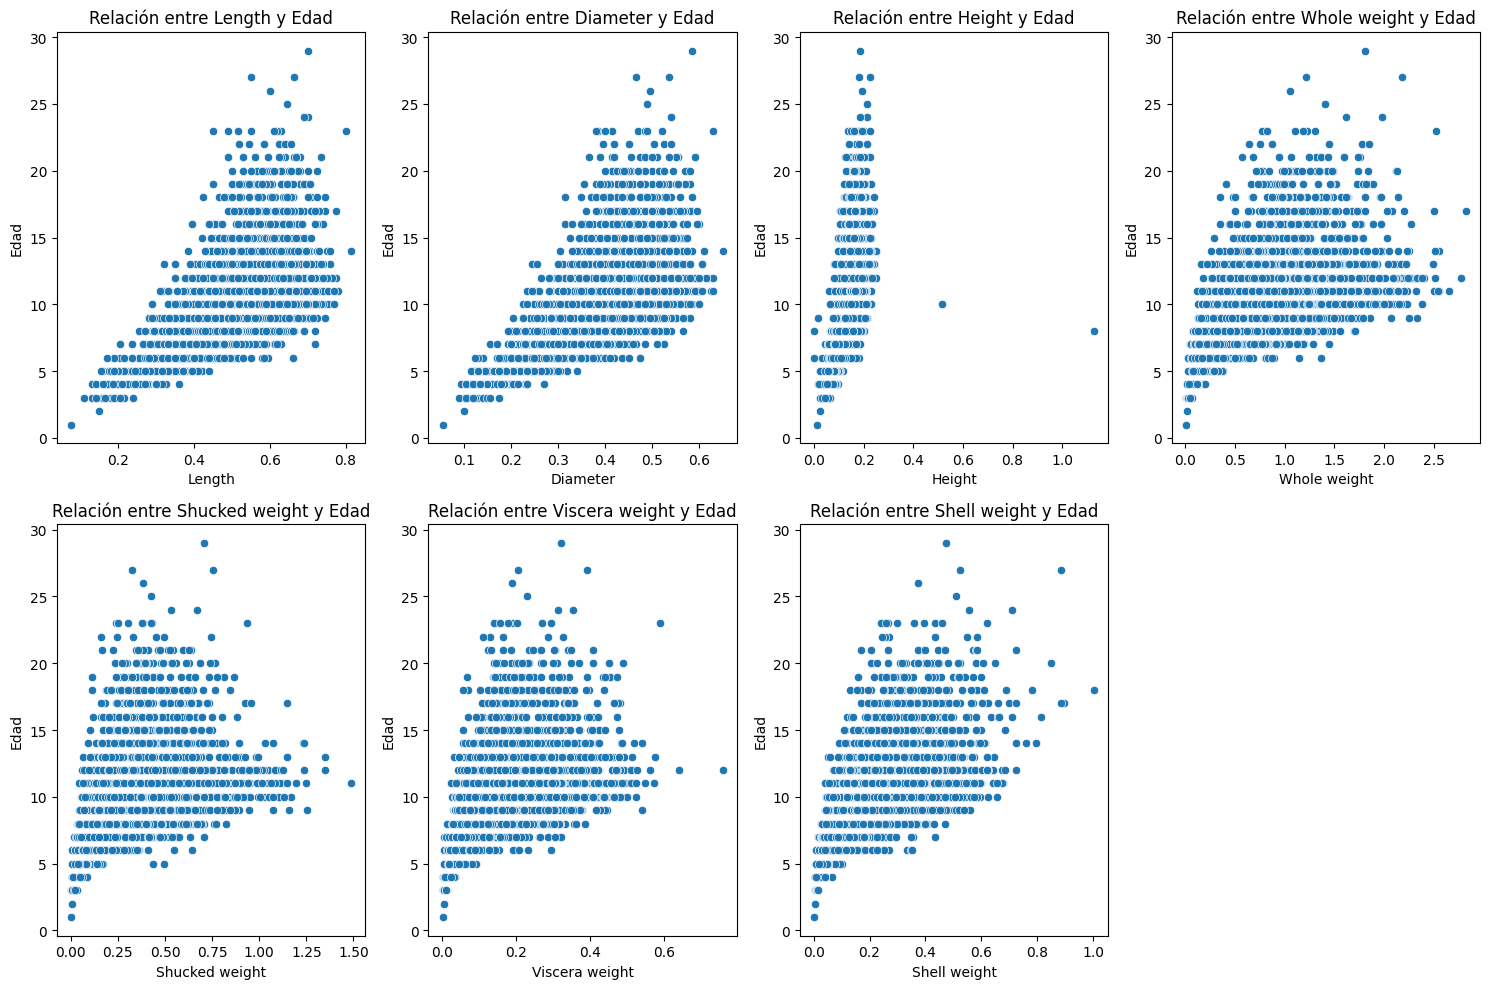

In [6]:
# Relación entre características y edad
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.scatterplot(x=df[feature], y=df['Rings'])
    plt.title(f'Relación entre {feature} y Edad')
    plt.xlabel(feature)
    plt.ylabel('Edad')

plt.tight_layout()
plt.show()


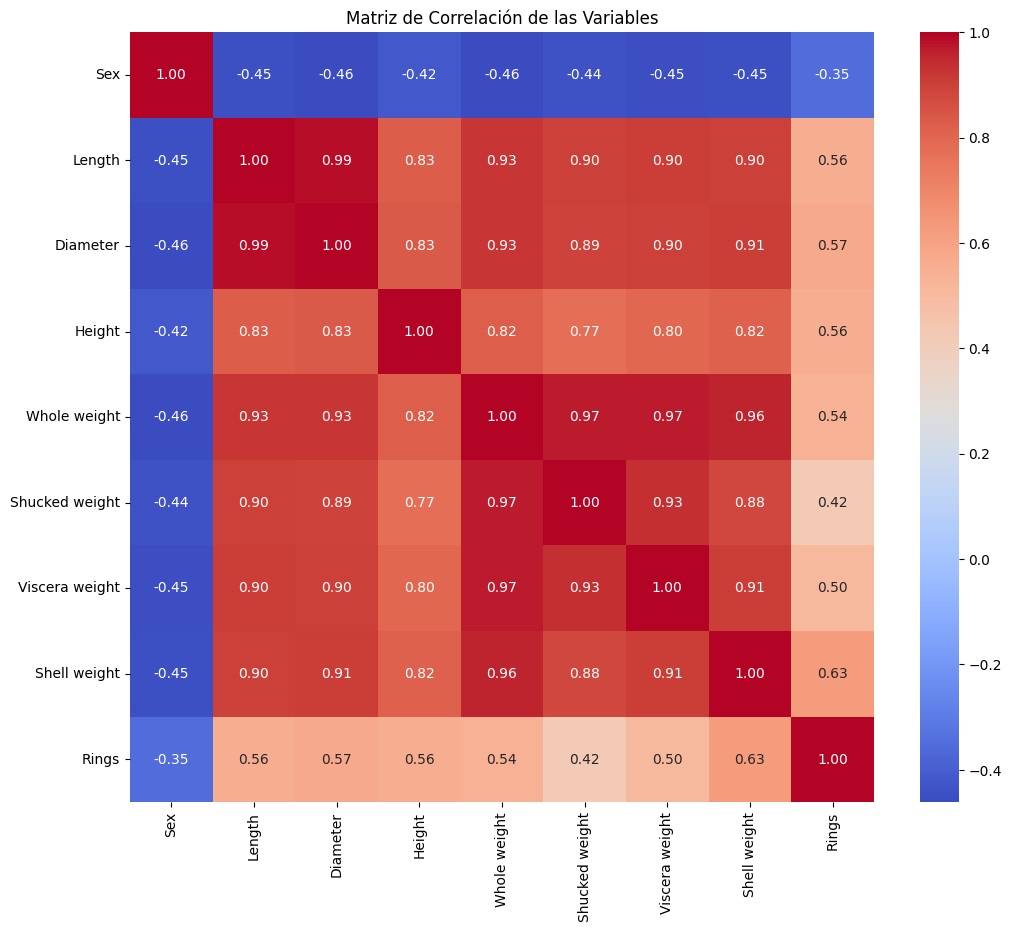

In [7]:
# Calcular la correlación entre variables
corr_matrix = df.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Variables')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')


Error Cuadrático Medio (MSE): 5.055541144299383


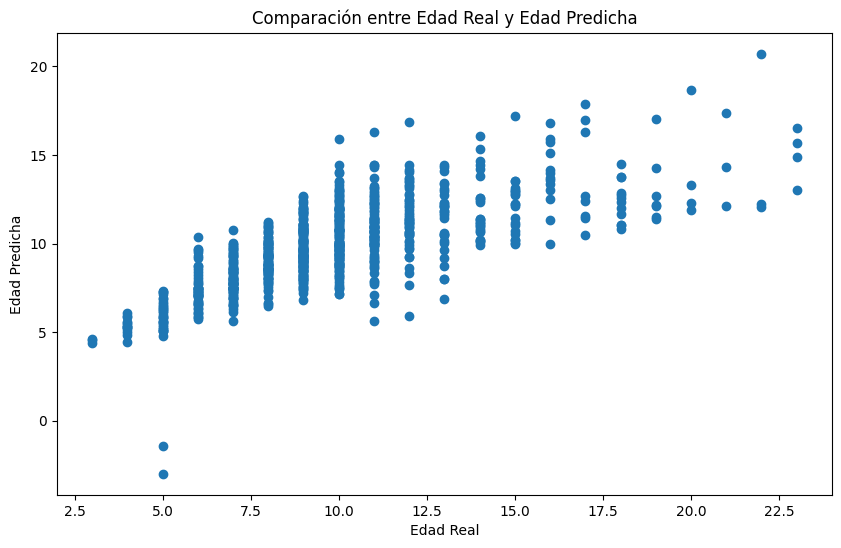

In [10]:
# Comparación entre las edades reales y las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Edad Real')
plt.ylabel('Edad Predicha')
plt.title('Comparación entre Edad Real y Edad Predicha')
plt.show()
